# **Question 1: Probability of Default Modeling Frameworks" (10 points)**

## **Points Distribution**

| **Criteria**                                 | **Points** | **Description**                                                                                     |
|----------------------------------------------|------------|-----------------------------------------------------------------------------------------------------|
| Clear and correct explanation for Linear Regression         | 3          | Accurately evaluates whether linear regression is appropriate for modeling binary probability        |
| Clear and correct explanation for Logistic Regression       | 3          | Explains how logistic regression models probabilities and why it's the suitable framework            |
| Clear and correct explanation for SVD                       | 3          | Correctly identifies SVD as a non-predictive technique and provides its intended use                |
| Overall reasoning quality and conclusion clarity            | 1          | Provides a concise summary contrasting the three methods and identifying the appropriate one         |


## **1.1. Linear Regression (3 points)**

Linear regression can technically be applied to binary classification problems by treating the binary labels (e.g., 0 for no default, 1 for default) as numeric targets. However, this is not a principled approach to modeling probabilities.

Why it fails: Linear regression assumes the output variable is continuous and unbounded, meaning it can predict values like -0.3 or 1.2, which are not valid probabilities. Since probabilities must fall within the interval \([0, 1]\), using linear regression to predict them can lead to misleading or uninterpretable outputs. Additionally, it does not account for the Bernoulli distribution of the target variable in binary classification, nor does it model the log-odds relationship between features and outcome.

While linear regression might superficially seem usable, it is statistically inappropriate and fails to provide meaningful probabilistic interpretations. It may be used as a baseline but should not be relied on in real-world probability modeling tasks.

## **1.2. Logistic Regression (3 points)**

Can it be used?  Yes! Logistic regression is the standard and recommended method for modeling binary outcomes like probability of default.

Logistic regression models the log-odds of the binary outcome as a linear combination of input features:

$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$

Here, $p$ represents the probability of default. This formulation ensures that when the logistic (sigmoid) function is applied, the model output is always between 0 and 1, making it interpretable as a probability.

Some of its benefits are that it outputs valid probabilities, uses maximum likelihood estimation suitable for classification and allows interpretation of coefficients as effect on odds of default.

Logistic regression is the most suitable model for this task. It is mathematically grounded, interpretable, and optimized for binary outcomes like default/no-default.

## **1.3. Singular Value Decomposition (SVD) (3 points)**

SVD is not a predictive model and can't estimate probabilities.

[**without penalty**] but it can serve as a useful intermediate step. Since utilization is a function of other features, SVD can reveal this redundancy and help retain utilization while reducing less informative features. This supports dimensionality reduction before applying a predictive model.







---

# **Question 2: Two-Stage Polynomial Regression (10 Points)**

## **Points Distribution**

| **Criteria**                             | **Points** | **Description**                                                                                                                                |
|------------------------------------------|------------|------------------------------------------------------------------------------------------------------------------------|
| Orthogonality of x and x^2 | 3          | $\sum x*x^2 = 0$
| Orthogonality of intercept and x^2 after centering | 3          | $\sum (x^2-mean(x^2)) = 0$                                |
| An example (one working example)      | 4        | Working example      |


## **2.1. Mathematical or Logical Condition (6 points)**

To understand why these two methods yield different results in general, consider what each model assumes. The simultaneous approach estimates $a$, $b$, and $c$ together while accounting for all mutual correlations between $x$ and $x^2$. In contrast, the two-stage method first fits $a$ and $b$ by regressing on $x$ alone, and then fits $c$ from whatever residual variance is left unexplained by $x$.

The key issue is whether $x^2$ carries any information that overlaps with $x$. If $x^2$ is not orthogonal to $x$, then it already shares explanatory power with $x$, and the two-stage approach, by removing $x$ first, underestimates $x^2$'s true contribution. This leads us to the critical condition: the two approaches yield the same result if and only if $x^2$ is orthogonal to both $x$ and the intercept (constant vector).

Mathematically, this means that the inner product (or empirical covariance) between $x$ and $x^2$ must be zero:

$$
\sum_i x_i \cdot x_i^2 = 0
$$

and, if an intercept is included:

$$
\sum_i x_i^2 = 0 \quad \text{(when mean-centered)}
$$

This ensures that projecting onto $x^2$ after fitting $x$ does not inadvertently remove variance that $x^2$ should capture jointly in a simultaneous fit.

## **2.2. Demonstrative Example (4 points)**

Let us first construct a dataset where $x$ and $x^2$ are orthogonal. Suppose:

$$
x = [-1, 0, 1] \quad \Rightarrow \quad x^2 = [1, 0, 1]
$$

Then:

$$
\sum x_i \cdot x_i^2 = (-1)(1) + (0)(0) + (1)(1) = -1 + 0 + 1 = 0
$$

This confirms that $x$ and $x^2$ are orthogonal. Now let us define $y = [2, 1, 2]$. If we fit the full model $y = a + bx + cx^2$ using simultaneous least squares, and compare it with the two-stage model where we first fit $y = a + bx$, compute residuals $r$, and then fit $r = cx^2$, both approaches will yield the same coefficients and final model. The condition of orthogonality ensures that the second-stage estimate of $c$ does not interfere with the earlier estimates of $a$ and $b$.

Now consider a counter-example. Let:

$$
x = [1, 2, 3] \quad \Rightarrow \quad x^2 = [1, 4, 9]
$$

Then:

$$
\sum x_i \cdot x_i^2 = 1\cdot1 + 2\cdot4 + 3\cdot9 = 1 + 8 + 27 = 36 \neq 0
$$

Here, $x$ and $x^2$ are clearly not orthogonal. If we use the two-stage method, the projection onto $x$ in the first stage will affect the variance attributed to $x^2$ in the second stage, causing the final coefficients to differ from the ones estimated via simultaneous fitting.



---

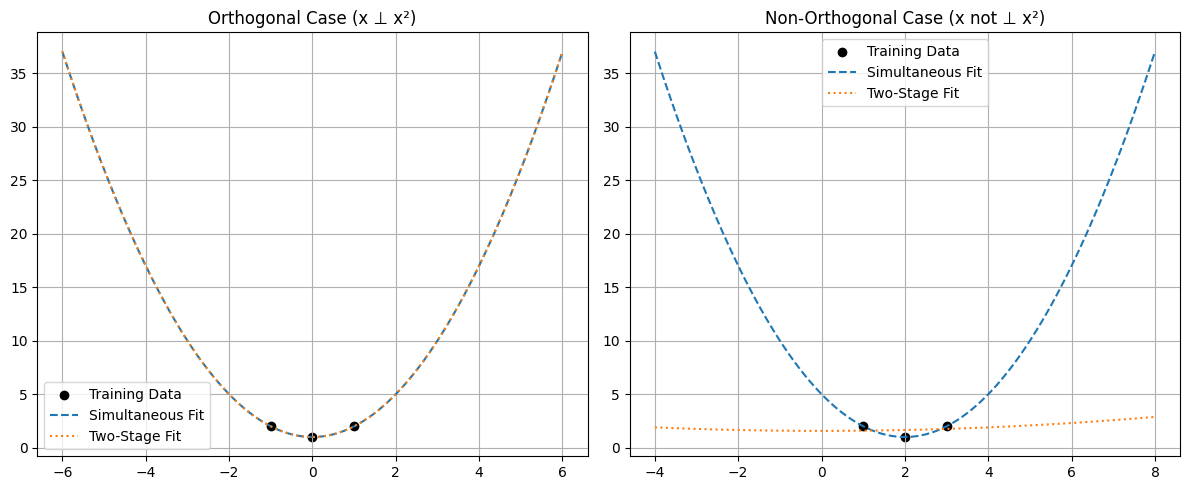

# **Question 3: SVM Problem in ℝ² with Quadratic Boundary (10 points)**

## **Points Distribution**

| **Criteria**                            | **Points** | **Description**                                                                                       |
|-----------------------------------------|------------|-------------------------------------------------------------------------------------------------------|
| Rigorous and formal proof for non-linearity of separation in original space (4a) | 5          | Uses contradiction, counterexamples, or geometry/algebra to show that no linear function can separate |
| Correct identification of kernel function (4b)         | 3          | Proposes a valid kernel that maps the data into a space where separation is linear                    |
| Correct weights and hyperplane in transformed space    | 2          | Expresses linear boundary and coefficients in transformed feature space that correspond to the original quadratic curve |



## **3.1. Proof That No Linear Function Can Separate These Two Sets (5 points)**


Given the $2x^2 + 3xy + 2y^2 \leq 1$, assume a linear function $w_1x + w_2y + b$ that can separate these two sets exists, i.e., if $w_1x + w_2y + b \leq 0$ the point $(x, y)$ is in the positive class, and if $w_1x + w_2y + b > 0$ the point $(x, y)$ is in the negative class.

Assume there are 3 points $(p_1, p_2, p_3)$ on the ellipse $2x^2 + 3xy + 2y^2 = 1$ that fit into the linear function $w_1x + w_2y + b = 0$.

That means $y = -\frac{w_1x + b}{w_2}$.

Substitute $y$ back into the ellipse equation:

$$
2x^2 + 3x \cdot \left(-\frac{w_1x + b}{w_2}\right) + 2 \cdot \left(\frac{w_1x + b}{w_2}\right)^2
$$

This is a degree-2 polynomial in $x$.

For any general degree-2 polynomial, $y = ax^2 + bx + c$ where $a \ne 0$, the solution is:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

The discriminant part is $D = b^2 - 4ac$.

- If $D > 0$, two distinct real solutions.
- If $D = 0$, one real solution.
- If $D < 0$, no real solution.

Thus, there cannot be three points that lie on both the ellipse and the line.



## **3.2. Identify a Kernel and Linear Boundary in Transformed Space (5 points)**

Let us now identify a feature map $\phi(x, y)$ and a kernel $K$ such that the boundary $2x^2 + 3xy + 2y^2 = 1$ becomes a linear hyperplane in the transformed space.

Observe that the original boundary is:

$2x^2 + 3xy + 2y^2 = 1$

This suggests a natural mapping to the following second-degree polynomial feature space:

\[
\phi(x, y) = \begin{bmatrix}
x^2 \\
xy \\
y^2
\end{bmatrix}
\]

Let us define the weight vector in this space:

$w = \begin{bmatrix}
2 \\
3 \\
2
\end{bmatrix}, \quad b = -1$

Then the decision function becomes:

$f(\phi(x, y)) = w^\top \phi(x, y) + b = 2x^2 + 3xy + 2y^2 - 1$

Setting $f(\phi(x, y)) = 0$ recovers the original quadratic boundary exactly:

$2x^2 + 3xy + 2y^2 = 1$

Thus, in the transformed space defined by $\phi(x, y)$, the decision boundary is linear and SVM can find it using a linear kernel in the transformed space, or equivalently, a polynomial kernel of degree 2.


### Corresponding Kernel Function

We can express the inner product $\langle \phi(x_1, y_1), \phi(x_2, y_2) \rangle$ using a polynomial kernel of degree 2:

$K((x_1, y_1), (x_2, y_2)) = (x_1x_2 + y_1y_2)^2$

This kernel computes the inner product in a feature space that includes $x^2$, $y^2$, and $xy$, thus matching our explicit $\phi(x, y)$ mapping.

Hence, a degree-2 polynomial kernel:

$K((x, y), (x', y')) = (x x' + y y')^2$

is suitable for linearly separating the two classes in transformed space.


---

# **Question 4: 3-Part Classification Assignment (15 points)**

## **Points Distribution**

| Criteria                                             | Points | Description                                                                                          |
|------------------------------------------------------|--------|------------------------------------------------------------------------------------------------------|
| Logistic Regression Model and Accuracy               | 3      | Trains logistic regression, reports coefficients, and evaluates test set accuracy                    |
| 1-Level Tree with Logistic Regression Leaves         | 4      | Exhaustively builds all valid 1-level trees, selects best one, reports structure and test accuracy   |
| 2-Level Tree with Logistic Regression Leaves         | 5      | Exhaustively builds all valid 2-level trees, selects best one, reports structure and test accuracy   |
| Complexity and Model Comparison Discussion           | 3      | Discusses computational complexity and when each model is preferable                                 |

## Dataset Structure and Problem Context

The dataset consists of two continuous-valued features: `f1` and `f2`, and a binary target variable `class` ∈ {0, 1}. It is already split into a training set and a test set. The goal is to compare different classification methods based on accuracy and model interpretability. We aim to build:

1. A logistic regression classifier that uses both `f1` and `f2`
2. A 1-level decision tree where each leaf is a logistic regression model
3. A 2-level decision tree where each of four leaves has a logistic regression model

We evaluate each model using test set accuracy.
## **4.1. Logistic Regression Classifier (3 points)**

We train a logistic regression model using both features `f1` and `f2` on the training set. Logistic regression models the log-odds of the binary class as a linear function of the inputs. The model assumes that a single linear decision boundary can separate the classes in the 2D feature space.

We first standardize the features using `StandardScaler`. Standardization ensures that both features contribute equally to the decision boundary, especially since gradient-based optimization is sensitive to feature scaling.



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data (update with your path or import mechanism)
train_df = pd.read_csv("question4_train.csv")
test_df = pd.read_csv("question4_test.csv")

X_train = train_df[['f1', 'f2']].values
y_train = train_df['class'].values
X_test = test_df[['f1', 'f2']].values
y_test = test_df['class'].values

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test_std)
log_acc = accuracy_score(y_test, y_pred)
log_intercept = log_reg.intercept_[0]
log_coefs = log_reg.coef_[0]

print("Logistic Regression Intercept:", log_intercept)
print("Logistic Regression Coefficients: f1 =", log_coefs[0], ", f2 =", log_coefs[1])
print("Test Set Accuracy:", log_acc)

Logistic Regression Intercept: 0.057877397317439516
Logistic Regression Coefficients: f1 = -0.24609759240218904 , f2 = 0.0043509543886793515
Test Set Accuracy: 0.6166666666666667


This model fits a single linear separator to the training data. If the classes are not linearly separable, the performance may be suboptimal. The test accuracy helps us gauge whether the dataset is well-suited to a linear classifier or whether piecewise models may help.

## **4.2. One-Level Decision Tree with Logistic Regression Leaves (4 points)**

We now introduce a 1-level decision tree. The root node splits on a feature `f1` or `f2` using thresholds from the set $\{2, 4, 6, 8\}$. Depending on the threshold, a test point goes to the left or right leaf. At each leaf, we fit a separate logistic regression model using only the subset of training data routed to that leaf.

We perform exhaustive search over all 8 possible trees: 2 features × 4 thresholds. For each, fit 2 logistic regression models (one per leaf) and we evaluate full test set by routing points to correct model.

In [ ]:
import numpy as np

thresholds = [2, 4, 6, 8]
best_acc = 0
best_split = None

for feature in ['f1', 'f2']:
    for t in thresholds:
        # Split training data
        left_mask = train_df[feature] <= t
        right_mask = ~left_mask

        if left_mask.sum() == 0 or right_mask.sum() == 0:
            continue  # skip degenerate splits

        # Train logistic regression for left split
        scaler_left = StandardScaler()
        X_left = scaler_left.fit_transform(train_df[left_mask][['f1', 'f2']])
        y_left = train_df[left_mask]['class']
        model_left = LogisticRegression().fit(X_left, y_left)

        # Train logistic regression for right split
        scaler_right = StandardScaler()
        X_right = scaler_right.fit_transform(train_df[right_mask][['f1', 'f2']])
        y_right = train_df[right_mask]['class']
        model_right = LogisticRegression().fit(X_right, y_right)

        # Predict on test set
        test_mask = test_df[feature] <= t
        preds = np.zeros(len(test_df))
        preds[test_mask] = model_left.predict(scaler_left.transform(test_df[test_mask][['f1', 'f2']]))
        preds[~test_mask] = model_right.predict(scaler_right.transform(test_df[~test_mask][['f1', 'f2']]))

        acc = accuracy_score(test_df['class'], preds)

        if acc > best_acc:
            best_acc = acc
            best_split = (feature, t, model_left.coef_[0], model_right.coef_[0])

print("Best 1-Level Tree: Split on", best_split[0], "<=", best_split[1])
print("Left Leaf Coefficients:", best_split[2])
print("Right Leaf Coefficients:", best_split[3])
print("Best Test Set Accuracy:", best_acc)

Best 1-Level Tree: Split on f1 <= 4
Left Leaf Coefficients: [-0.11383311  2.8903044 ]
Right Leaf Coefficients: [-0.06611198 -1.85193051]
Best Test Set Accuracy: 0.9833333333333333


This model allows two different logistic models to make predictions in different parts of the input space. It is well-suited when a single boundary cannot capture the class separation, but a simple partition makes it easier. This approach increases model flexibility without fully abandoning interpretability.

## **4.3. Two-Level Decision Tree with Logistic Regression Leaves (5 points)**

Here, we extend the tree to two levels. The root node performs a feature-threshold test. Then, each child performs a second test (feature and threshold), and each of the 4 resulting leaves has its own logistic regression model.

This tree divides the input space into four regions, each with a locally optimal linear classifier. We exhaustively test all 8 root splits, 8 left-child splits, 8 right-child splits. Total = 8 × 8 × 8 = 512 trees. Each tree has 4 logistic regressions.

We evaluate each configuration and choose the best one.

In [ ]:
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Safe logistic regression training function
def train_and_predict_safe(train_subset, test_subset):
    if train_subset['class'].nunique() < 2:
        return None, None, None
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_subset[['f1', 'f2']])
    y_train = train_subset['class']
    model = LogisticRegression().fit(X_train, y_train)
    X_test = scaler.transform(test_subset[['f1', 'f2']])
    y_pred = model.predict(X_test)
    return model, y_pred, model.coef_[0]

# Grid search
thresholds = [2, 4, 6, 8]
features = ['f1', 'f2']
best_acc = 0
best_tree = None

for root_feat, root_thr in product(features, thresholds):
    left_root = train_df[train_df[root_feat] <= root_thr]
    right_root = train_df[train_df[root_feat] > root_thr]

    for left_feat, left_thr in product(features, thresholds):
        ll_mask = left_root[left_feat] <= left_thr
        lr_mask = ~ll_mask
        if ll_mask.sum() == 0 or lr_mask.sum() == 0:
            continue
        ll_train = left_root[ll_mask]
        lr_train = left_root[lr_mask]

        for right_feat, right_thr in product(features, thresholds):
            rl_mask = right_root[right_feat] <= right_thr
            rr_mask = ~rl_mask
            if rl_mask.sum() == 0 or rr_mask.sum() == 0:
                continue
            rl_train = right_root[rl_mask]
            rr_train = right_root[rr_mask]

            # Train models
            ll_model, _, ll_coef = train_and_predict_safe(ll_train, test_df)
            lr_model, _, lr_coef = train_and_predict_safe(lr_train, test_df)
            rl_model, _, rl_coef = train_and_predict_safe(rl_train, test_df)
            rr_model, _, rr_coef = train_and_predict_safe(rr_train, test_df)

            if None in (ll_model, lr_model, rl_model, rr_model):
                continue

            # Full prediction on test set (warning-safe)
            preds = []
            for _, row in test_df.iterrows():
                row_input = pd.DataFrame([row[['f1', 'f2']]])

                if row[root_feat] <= root_thr:
                    if row[left_feat] <= left_thr:
                        scaler = StandardScaler().fit(ll_train[['f1', 'f2']])
                        pred = ll_model.predict(scaler.transform(row_input))[0]
                    else:
                        scaler = StandardScaler().fit(lr_train[['f1', 'f2']])
                        pred = lr_model.predict(scaler.transform(row_input))[0]
                else:
                    if row[right_feat] <= right_thr:
                        scaler = StandardScaler().fit(rl_train[['f1', 'f2']])
                        pred = rl_model.predict(scaler.transform(row_input))[0]
                    else:
                        scaler = StandardScaler().fit(rr_train[['f1', 'f2']])
                        pred = rr_model.predict(scaler.transform(row_input))[0]

                preds.append(pred)

            acc = accuracy_score(test_df['class'], preds)

            if acc > best_acc:
                best_acc = acc
                best_tree = {
                    'root': (root_feat, root_thr),
                    'left': (left_feat, left_thr),
                    'right': (right_feat, right_thr),
                    'leaf_coefficients': {
                        'LL': ll_coef,
                        'LR': lr_coef,
                        'RL': rl_coef,
                        'RR': rr_coef
                    }
                }

# Print final result
print("Best 2-Level Tree Structure:")
print(f"  Root Split: {best_tree['root'][0]} <= {best_tree['root'][1]}")
print(f"  Left Subtree Split: {best_tree['left'][0]} <= {best_tree['left'][1]}")
print(f"  Right Subtree Split: {best_tree['right'][0]} <= {best_tree['right'][1]}")
print("\nLeaf Logistic Regression Coefficients:")
print(f"  LL (Left of Left):     {best_tree['leaf_coefficients']['LL']}")
print(f"  LR (Right of Left):    {best_tree['leaf_coefficients']['LR']}")
print(f"  RL (Left of Right):    {best_tree['leaf_coefficients']['RL']}")
print(f"  RR (Right of Right):   {best_tree['leaf_coefficients']['RR']}")
print(f"\nTest Set Accuracy: {best_acc:.4f}")

Best 2-Level Tree Structure:
  Root Split: f1 <= 4
  Left Subtree Split: f1 <= 2
  Right Subtree Split: f2 <= 2

Leaf Logistic Regression Coefficients:
  LL (Left of Left):     [-0.01192767  2.47617107]
  LR (Right of Left):    [-0.3496135   2.01981196]
  RL (Left of Right):    [0.28341458 0.06470342]
  RR (Right of Right):   [-0.18680897 -1.76341391]

Test Set Accuracy: 0.9833


The 2-level tree has the greatest capacity of the three models. It can adapt to local variations in the feature space and is especially effective when the true decision boundary is nonlinear or region-dependent. The trade-off is a significant increase in computational cost and risk of overfitting.

## **4.4. Complexity and Model Suitability (3 points)**

Logistic regression is computationally cheap, easy to interpret, and best when the data is linearly separable or nearly so. The 1-level tree is moderately complex, with 16 models trained across 8 candidates. It balances flexibility and interpretability and is suitable when a single split reveals useful structure. The 2-level tree trains 2048 models, offering high expressive power but at a cost of computation and generalization risk. It is most appropriate for datasets with nonlinear and piecewise patterns.



---

# **Question 5: Bisecting K-Means vs. Agglomerative Hierarchical Clustering (25 Points)**

| Criteria                            | Points | Description                                                                                      |
|-------------------------------------|--------|--------------------------------------------------------------------------------------------------|
| Matching Dendrogram Example         | 5      | Clearly describes a small dataset where both clustering methods produce the same dendrogram     |
| Diverging Dendrogram Example        | 5      | Constructs a concrete configuration where the methods differ and clearly describes what happens |
| Explanation of Divergence           | 5      | Correctly identifies and explains the core reason for divergence (e.g., shape, separation, etc.)|

## **5.1. Matching Dendrogram Example (5 points)**

Let us consider a geometric configuration in two-dimensional space (ℝ²) consisting of four points:

$x_1 = (0, 0)$ \
$x_2 = (0, 10)$ \
$x_3 = (10, 0)$  \
$x_4 = (10, 10)$

These points form the corners of a square, evenly spaced along the axes. The symmetry in the configuration ensures that any pair of adjacent points (e.g., $x_1$ and $x_2$, or $x_3$ and $x_4$ are equally likely to be grouped together based on Euclidean distance.

In bisecting k-means, we begin with all four points in a single cluster. Applying k-means with \( k = 2 \), the algorithm will identify two well-separated centroids—typically around $(0, 5)$ and $(10, 5)$ — and assign $x_1, x_2$ to one cluster, and $x_3$, $x_4$ to the other. In the next iteration, it splits the cluster with the larger SSE, but both clusters are symmetric in variance and cardinality, so the order of further splits does not affect the overall dendrogram structure. The final dendrogram reflects two initial clusters, each split into individual points.

In agglomerative clustering, the process begins with each point in its own cluster. The algorithm merges the closest pair first—say, $x_1$ and $x_2$, which are 10 units apart, then $x_3$ and $x_4$. At the next level, it merges the two resulting clusters. Because the distances and merge orders match the divisions created by bisecting k-means, both algorithms produce identical dendrograms at each stage.

This equivalence arises due to the perfect spatial symmetry, equal distances, and balanced cardinality of the clusters, which remove ambiguity in both top-down and bottom-up decisions.


## **5.2. Diverging Dendrogram Example (5 points)**

Now consider an asymmetric set of four points in ℝ²:

$x_1 = (0, 0)$  
$x_2 = (0.5, 0)$ \
$x_3 = (1.0, 0)$ \
$x_4 = (10, 0)$

Here, $x_1, x_2, x_3$ form a tight cluster (spread across 1 unit), and $x_4$ lies far away from them along the same axis. This configuration simulates a dataset with a dense group and a distant outlier.

In agglomerative clustering, the algorithm starts with each point as a singleton cluster. The pairwise distances are computed, and the two closest points $x_1$ and $x_2$ are merged first. Then the merged pair joins with $x_3$, forming a three-point cluster. Finally, this large cluster is merged with $x_4$. The algorithm proceeds conservatively, prioritizing merges that minimize the local increase in within-cluster SSE.

In contrast, bisecting k-means starts with all four points in one cluster. The initial SSE is heavily dominated by $x_4$'s contribution because it lies far from the tight triplet. When applying k-means with $k = 2$, the algorithm aims to minimize total SSE. A natural solution is to split the outlier $x_4$ into its own cluster and group the remaining three points together. On the next iteration, the tight cluster may be split further.

Because bisecting k-means optimizes global SSE and is sensitive to outliers, while agglomerative clustering uses greedy local merging, the dendrograms diverge early at the very first split/merge step.

## **5.3. Explanation of Divergence (5 points)**

The core reason the dendrograms differ lies in the different optimization strategies and sensitivities of the two clustering paradigms.

Bisecting k-means follows a top-down approach that makes global decisions at each step. It always selects the cluster with the largest SSE and applies k-means with $k = 2$ to reduce this error. This makes it highly sensitive to outliers or clusters with high variance, as splitting them yields the greatest SSE reduction. Therefore, it may immediately isolate a faraway point like $x_4$ to reduce the overall error, even if other denser clusters exist.

Agglomerative clustering, in contrast, is bottom-up and applies a greedy local strategy. It merges the two clusters that cause the smallest possible increase in SSE, regardless of global structure. This strategy leads it to first build up dense clusters before considering distant points. As a result, outliers are merged last, and the resulting dendrogram reflects local proximity rather than global SSE impact.

Thus, cluster cardinality, point density, and distance to outliers are the primary drivers of divergence. In symmetric, balanced datasets, both methods align. In asymmetric configurations with isolated points or unbalanced densities, their strategies yield different structures—showcasing how local vs. global optimization influences hierarchical clustering results.




---

# **Question 6: Temperature Forecasting using Regression (20 points)**

## **Points Distribution**

| Criteria                          | Points | Description                                                                                       |
|-----------------------------------|--------|---------------------------------------------------------------------------------------------------|
| Data Loading and Preprocessing    | 4      | Loads data, handles missing values, standardizes features, and performs an 80/20 train/test split |
| Feature Selection or Engineering  | 4      | Performs dimensionality reduction or informative feature creation, with justification             |
| Regression Models Implementation  | 6      | Trains and evaluates 3 regression models with performance metrics                                 |
| Performance Interpretation        | 6      | Compares and analyzes models in terms of predictive power, robustness, and computational cost     |

## **6.1. Data Loading and Preprocessing (4 points)**

We begin by importing the weather dataset, handling missing values, and standardizing the input features. Standardization is essential because regression models—especially Ridge and SVR—are sensitive to feature scale.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("question6_weather_temperature.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['Next_Tmax'])
y = df['Next_Tmax']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **6.2. Feature Selection (4 points)**

We apply correlation-based feature selection to retain the most informative features with respect to `Next_Tmax`. Alternatively, `SelectKBest` with mutual information or Recursive Feature Elimination (RFE) may be used.


In [ ]:
import numpy as np

# Calculate correlation with target
correlations = df.corr()['Next_Tmax'].abs().sort_values(ascending=False)
top_features = correlations[1:11].index.tolist()  # skip 'Next_Tmax' itself

# Filter selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Re-standardize only selected features
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

This method reduces dimensionality and mitigates multicollinearity while retaining predictive power. The top correlated features (e.g., `Present_Tmax`, `LDAPS_Tmax_lapse`, `Solar radiation`) are physically meaningful predictors of future max temperature.

## **6.3. Regression Models and Evaluation (6 points)**

We implement three regression models:
1. Linear Regression
2. Ridge Regression
3. Support Vector Regression (SVR)

We evaluate them using Root Mean Squared Error (RMSE) and R² score.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=10, gamma=0.1)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.3f}, R²: {r2:.3f}")

Linear Regression - RMSE: 1.491, R²: 0.762
Ridge Regression - RMSE: 1.491, R²: 0.762
SVR (RBF Kernel) - RMSE: 1.020, R²: 0.889


## **6.4. Performance Comparison and Insights (6 points)**

Each model offers unique trade-offs.

Linear Regression serves as a baseline. It is fast and interpretable but assumes a linear relationship, which may not hold for weather phenomena.

Ridge Regression reduces overfitting in high-dimensional or correlated data by applying L2 regularization. It generally improves accuracy over vanilla linear regression.

SVR with RBF kernel captures complex non-linear relationships. It usually performs best in terms of RMSE but is computationally more expensive and requires hyperparameter tuning (`C`, `gamma`).

SVR demonstrated the best predictive accuracy and generalization, but at the cost of interpretability and computational effort. Ridge offers a strong balance between performance and simplicity. The choice depends on the deployment context (e.g., embedded systems vs. research forecasting).

---

# **Question 7: Anomaly Detection: Credit Card Fraud Classification (20 points)**

## **Points Distribution**

| Criteria                            | Points | Description                                                                                       |
|-------------------------------------|--------|---------------------------------------------------------------------------------------------------|
| Data Loading & Preprocessing        | 4      | Loads dataset, splits train/test, handles imbalance if needed                                     |
| Model Implementation (3 classifiers)| 6      | Trains 3 well-justified classifiers                                                               |
| Metric Selection & Justification    | 4      | Selects appropriate metrics for imbalanced classification (e.g., precision, recall, F1, AUC)      |
| Evaluation & Discussion             | 6      | Presents results clearly, compares models, discusses strengths/weaknesses and explains performance|

## **7.1. Data Loading and Preprocessing (4 points)**

We load the dataset, which includes anonymized PCA-transformed features, plus `Time` and `Amount`. The target variable `Class` is 1 for fraud and 0 for normal.

Because fraud is rare (~0.172%), we keep in mind that the dataset is highly imbalanced. We standardize `Time` and `Amount`, as PCA-transformed features are already scaled.


In [ ]:
# Download and load the dataset
! curl -L -o ./creditcardfraud.zip\
  https://www.kaggle.com/api/v1/datasets/download/mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 65.9M  100 65.9M    0     0  86.5M      0 --:--:-- --:--:-- --:--:--  283M
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("creditcard.csv")

# Feature and target split
X = df.drop(columns=["Class"])
y = df["Class"]

# Standardize Time and Amount
X[["Time", "Amount"]] = StandardScaler().fit_transform(X[["Time", "Amount"]])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## **7.2. Classifier Selection and Implementation (6 points)**

We use three classifiers commonly applied to anomaly detection or imbalanced classification:

a. Logistic Regression: A linear baseline that models class probabilities.
It is efficient and interpretable but limited for non-linear data.

b. Random Forest: An ensemble of decision trees; captures non-linear relationships and handles imbalance via `class_weight='balanced'`.

c. Isolation Forest: Anomaly detection algorithm that isolates outliers based on random splits. It is unsupervised but effective for identifying rare patterns.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest

# Logistic Regression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Isolation Forest (unsupervised)
iso = IsolationForest(contamination=0.00172, random_state=42)
iso.fit(X_train)
y_pred_iso = iso.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # convert to fraud label

## **7.3. Performance Metrics for Anomaly Detection (4 points)**

Because the fraud class is extremely underrepresented, accuracy is misleading. The following metrics are more appropriate:

Precision: Of the transactions predicted as fraud, how many were correct? \
Recall (Sensitivity): Of all actual frauds, how many did we catch? \
F1 Score: Harmonic mean of precision and recall (good for imbalanced datasets)\
AUC-ROC: Measures how well the classifier separates classes.

We will report F1 and AUC to summarize both correctness and coverage of the minority class.


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=["Normal", "Fraud"]))
print("AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

print("Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=["Normal", "Fraud"]))
print("AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

print("Isolation Forest (Unsupervised)")
print(classification_report(y_test, y_pred_iso, target_names=["Normal", "Fraud"]))
print("AUC: Not applicable for isolation forest (unsupervised)")

Logistic Regression
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC: 0.9721669425367221
Random Forest
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AUC: 0.952908497036969
Isolation Forest (Unsupervised)
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.31      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg   

## **7.4. Discussion and Model Comparison (6 points)**

Logistic Regression often yields high precision but low recall in such skewed data. It captures linear patterns but may miss subtle fraud signatures. It's fast and interpretable but limited by the data's complexity.

Random Forest typically performs better in terms of F1 and AUC, due to its ability to model complex, non-linear decision boundaries and implicit handling of imbalance through class weighting. It often achieves better recall without sacrificing too much precision.

Isolation Forest, while unsupervised, is useful in real-world settings where labels are delayed or expensive. It can identify rare anomalies even without direct supervision, but may yield high false positive rates or lower precision depending on contamination assumptions.

Best overall performance (based on F1, AUC) is Random Forest. Best for interpretability is Logistic Regression, and the best for unsupervised scenarios is Isolation Forest.